In [14]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

import numpy as np
import os

In [15]:
def plot_droped_packet_vs_time():
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
   
    droppedvstime = {}
    
    with open("bottleneck_monitor_attr", "r") as f2:
        lines = f2.readlines();
               
        
        for line in lines:
            split_line = line.split()
            droppedvstime[float(split_line[1])] = float(split_line[7])
            
        plt.xlabel("time")
        plt.ylabel("dropped packets")   
        
        droppedvstime_keys_list = [];
        
        for k in droppedvstime.keys():
            droppedvstime_keys_list.append(k);
            
        droppedvstime_values_list = [];
        
        v_old = 0;
        for v in droppedvstime.values():
            droppedvstime_values_list.append(v-v_old);
            # comment the following line to make the graph cumulative
            v_old = v;
            
        
        plt.plot(droppedvstime_keys_list[1750:], droppedvstime_values_list[1750:], label="dropped packets")

    f2.close()  

In [16]:
def plot_cwnd_vs_time(flavor = "default" , time = 200 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    flavor = flavor.capitalize()
    
    os.system("ns dumbell_tcp.tcl {0} {1} {2} {3} {4} {5} {6} {7}".format(flavor, time, queueL, noOfSource, total_input_bandwidth, bottleneck_bandwidth, RTT, recvWindow))

    
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    

    for i in range(noOfSource):
        
        cwndvstime = {}
        
        with open("tcp_{0}_{1}".format(flavor, i), "r") as f:
            lines = f.readlines()

        for line in lines:
            split_line = line.split()
            cwndvstime[float(split_line[0])] = float(split_line[1]);

        
        plt.plot(cwndvstime.keys(), cwndvstime.values() , label = "{0}".format(i))
        plt.xlabel("time")
        plt.ylabel("cwnd")
        plt.title("Sources = {0}     RTT = {1}ms.".format(noOfSource, RTT))
        f.close()
    
    
    plot_droped_packet_vs_time()
  
    # clean the .tr files after plotting.
    for i in range(noOfSource):
        os.system("rm -rf tcp_{0}_{1}".format(flavor, i))
        
    
    

### 120 sources

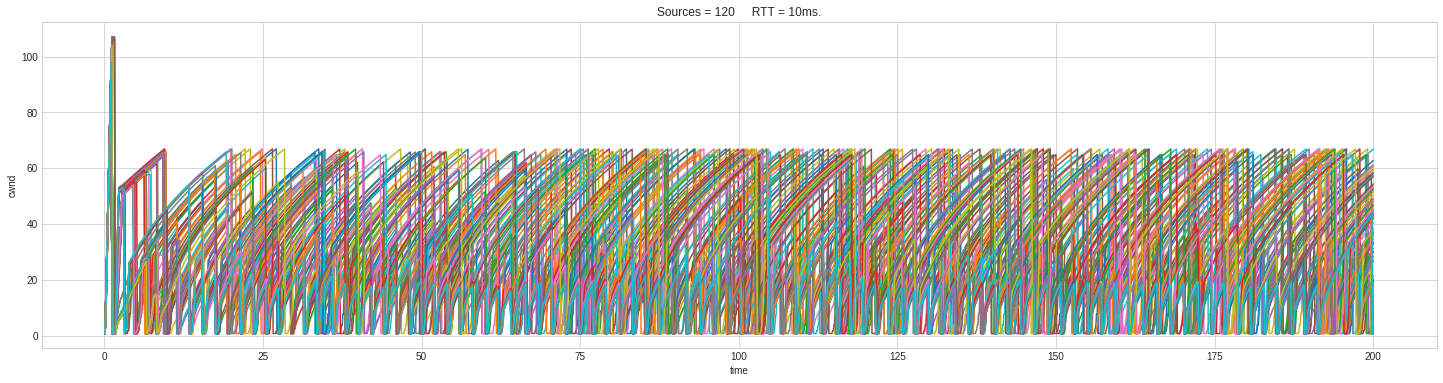

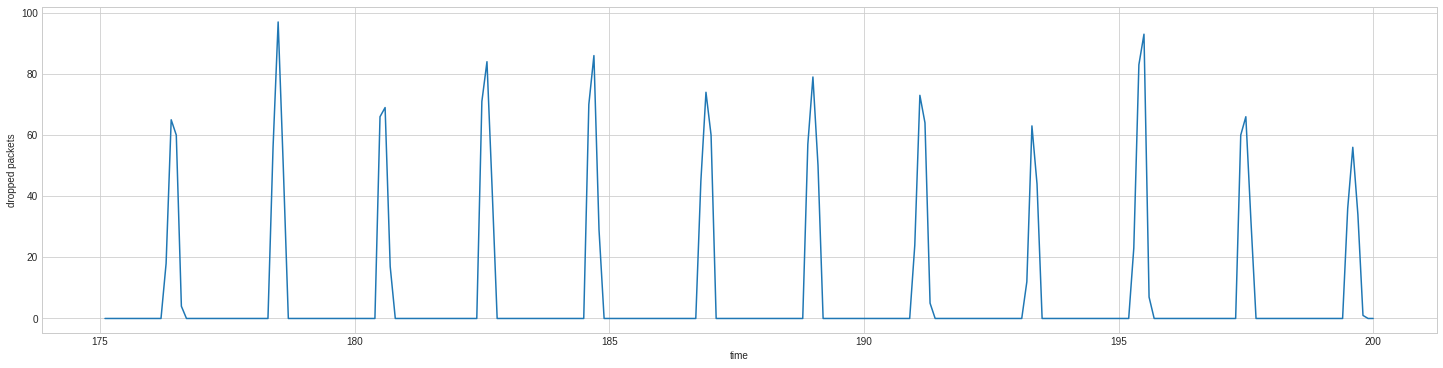

In [17]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 120, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 10, recvWindow = 10000)

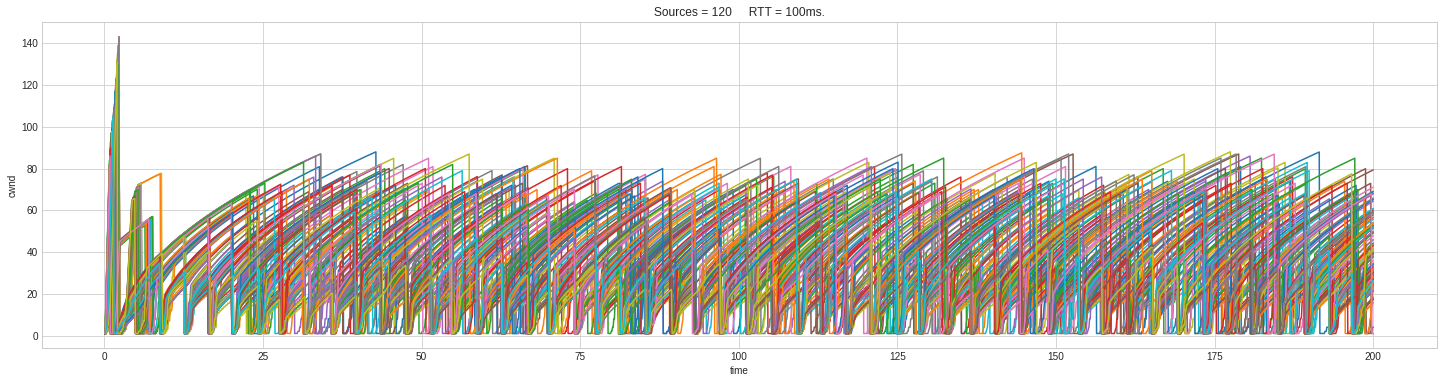

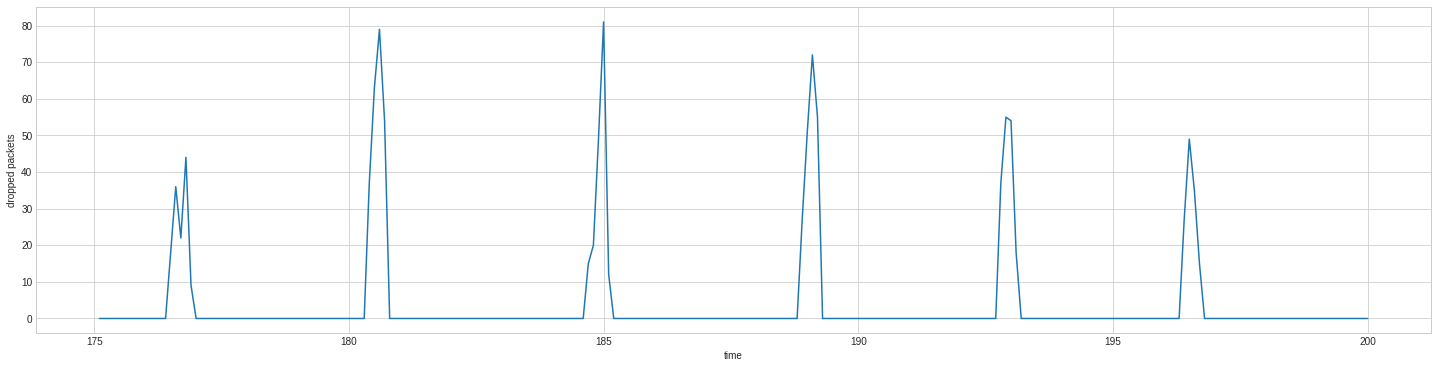

In [18]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 120, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 100, recvWindow = 10000)

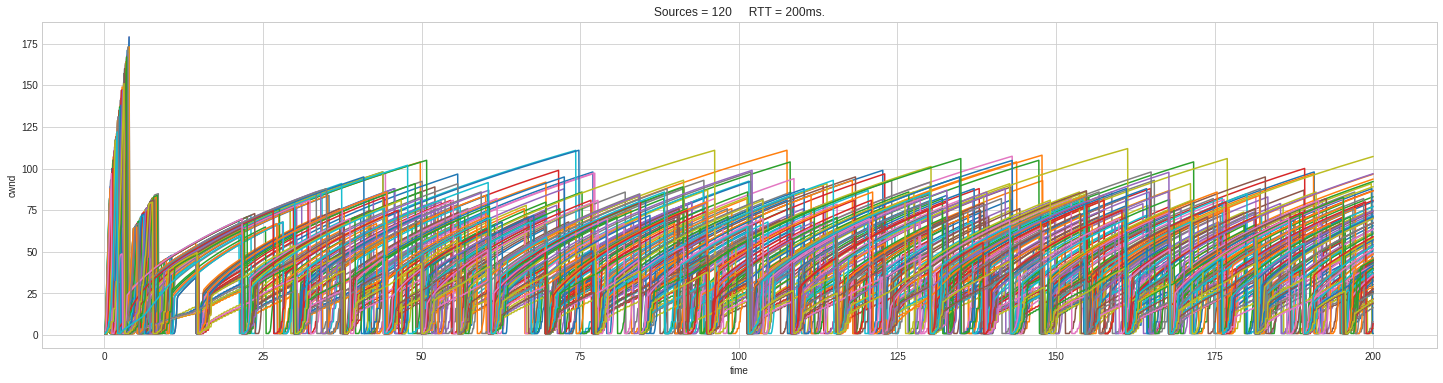

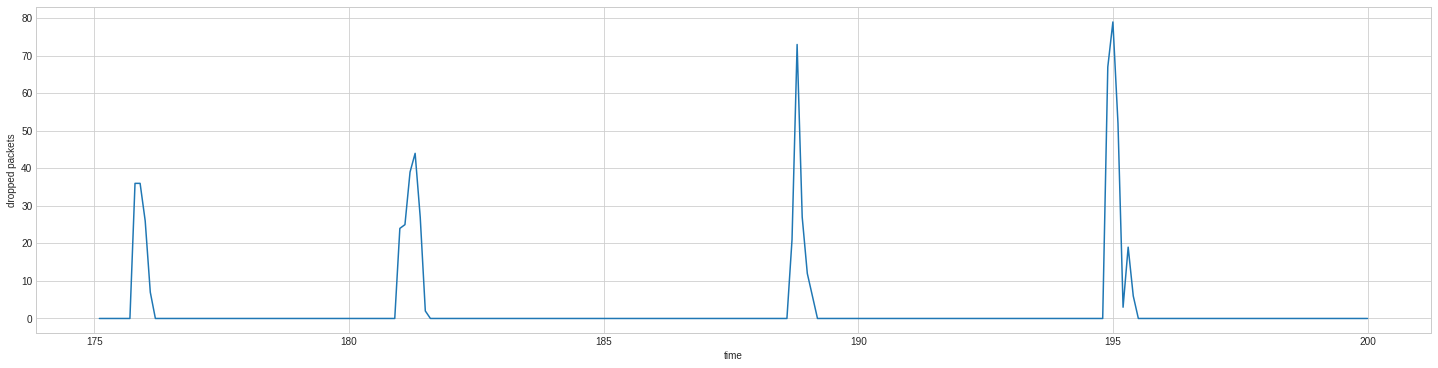

In [19]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 120, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 200, recvWindow = 10000)

### 60 sources

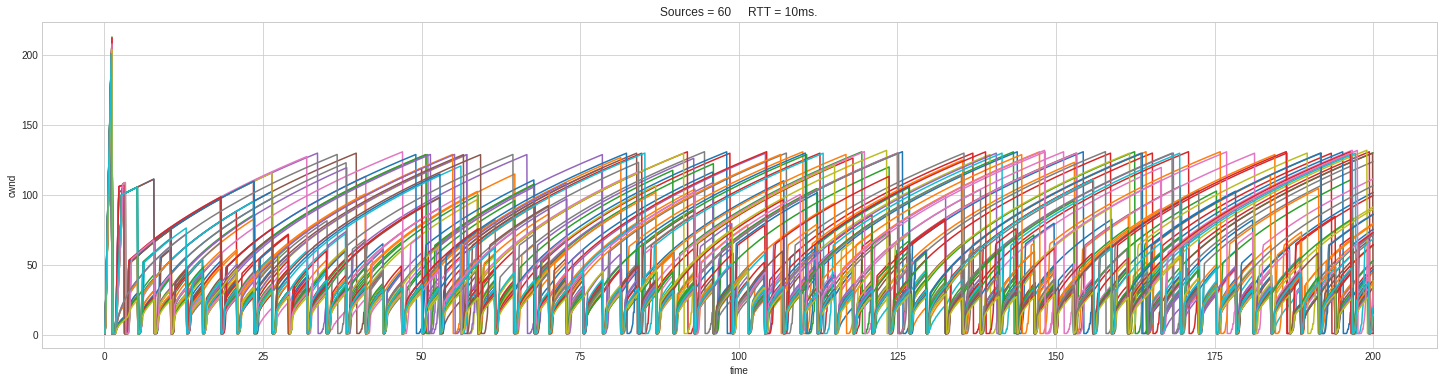

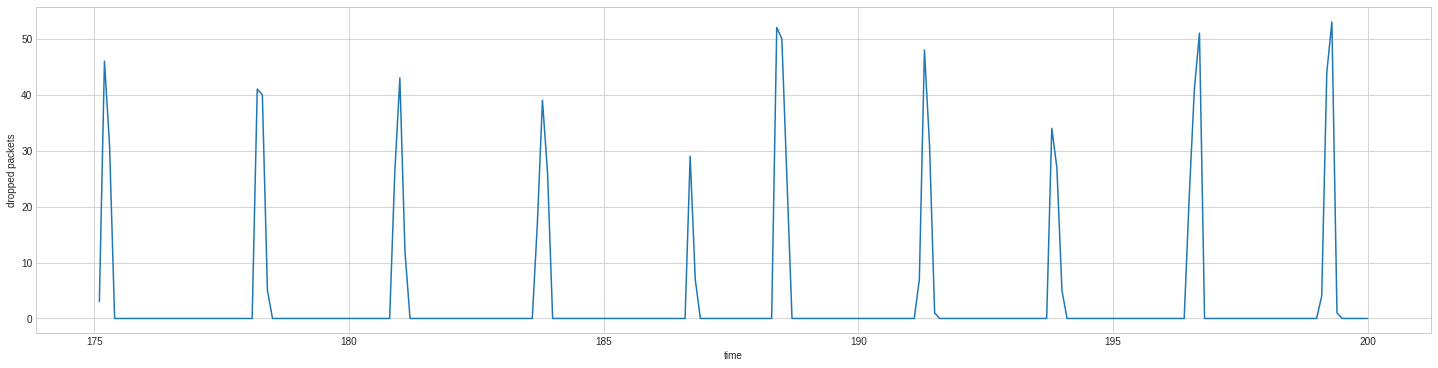

In [20]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 60, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 10, recvWindow = 10000)

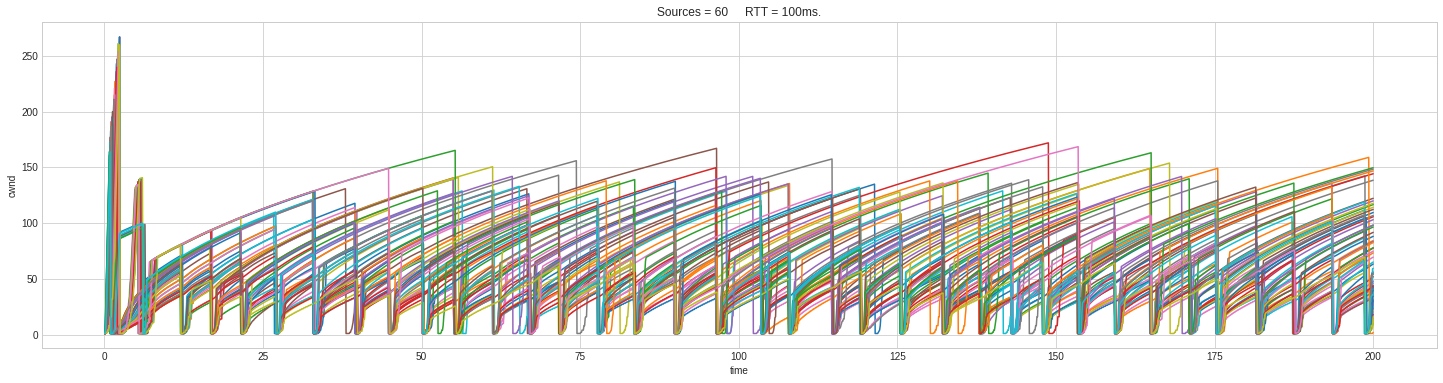

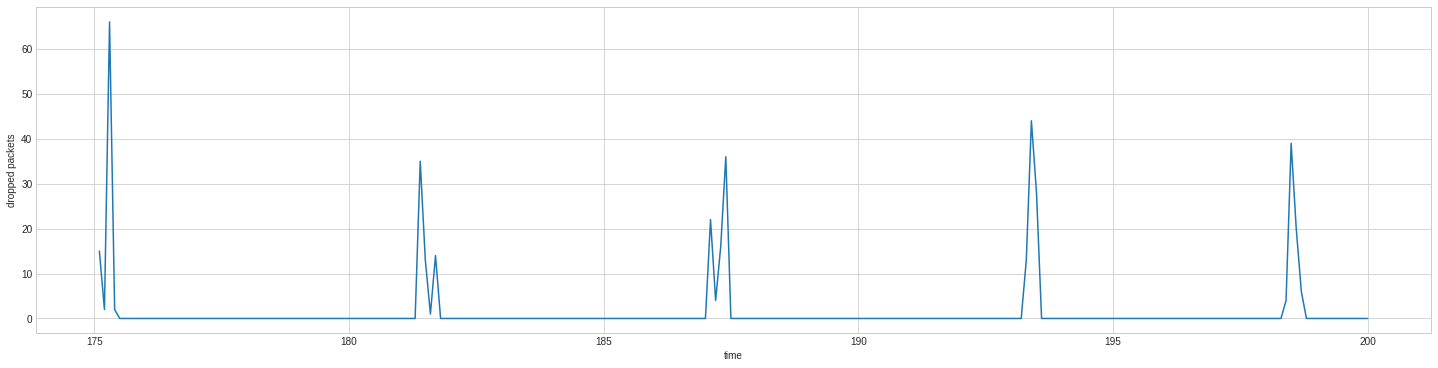

In [21]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 60, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 100, recvWindow = 10000)

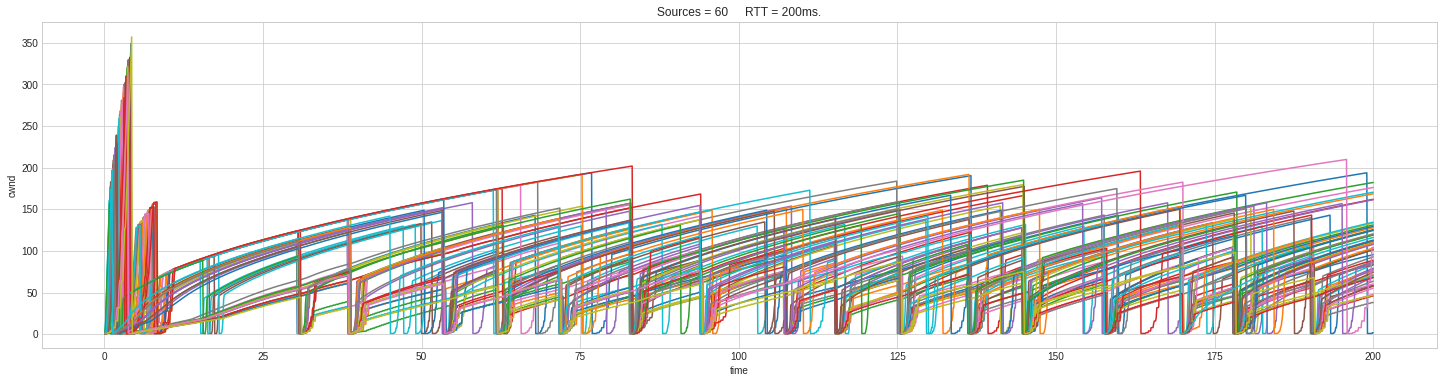

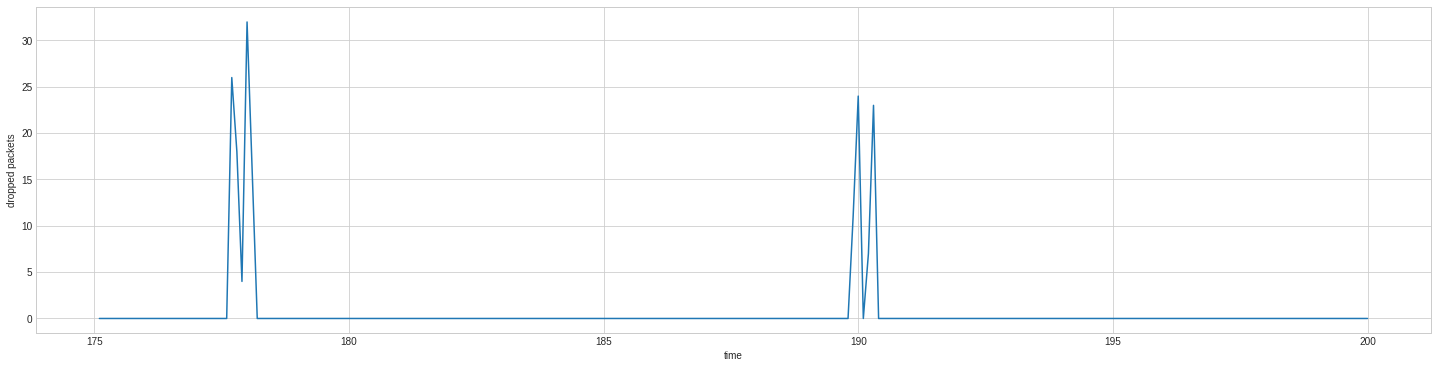

In [22]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 60, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 200, recvWindow = 10000)


### 40 sources

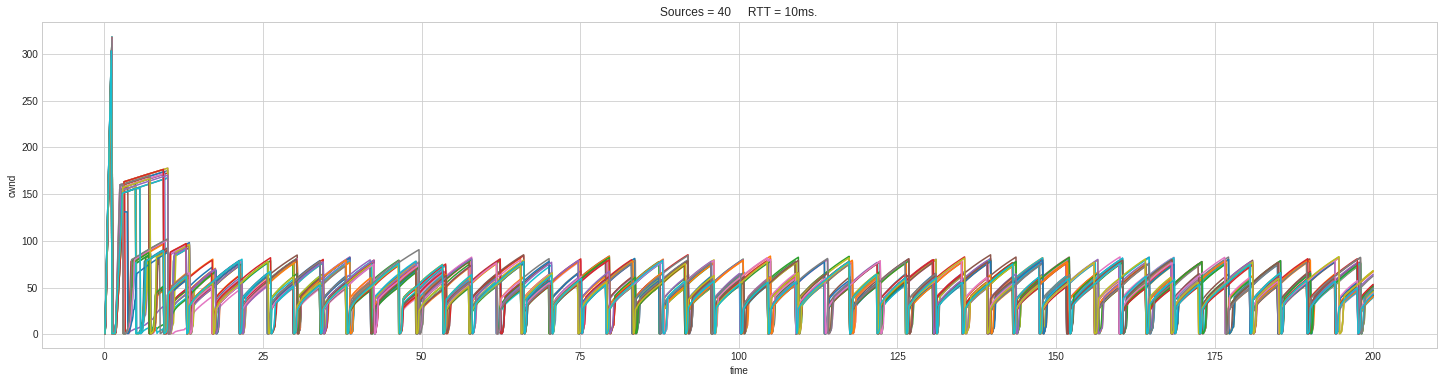

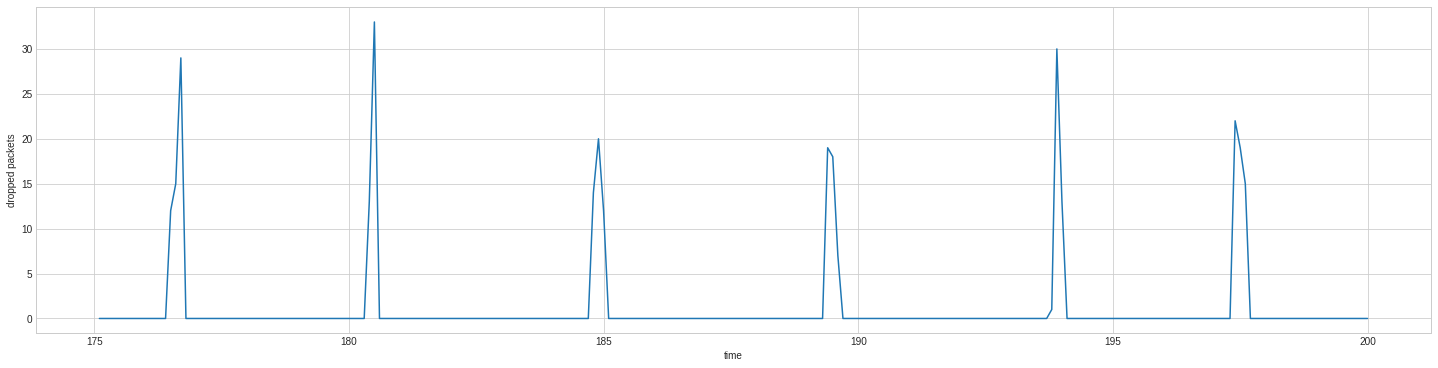

In [23]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 40, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 10, recvWindow = 10000)

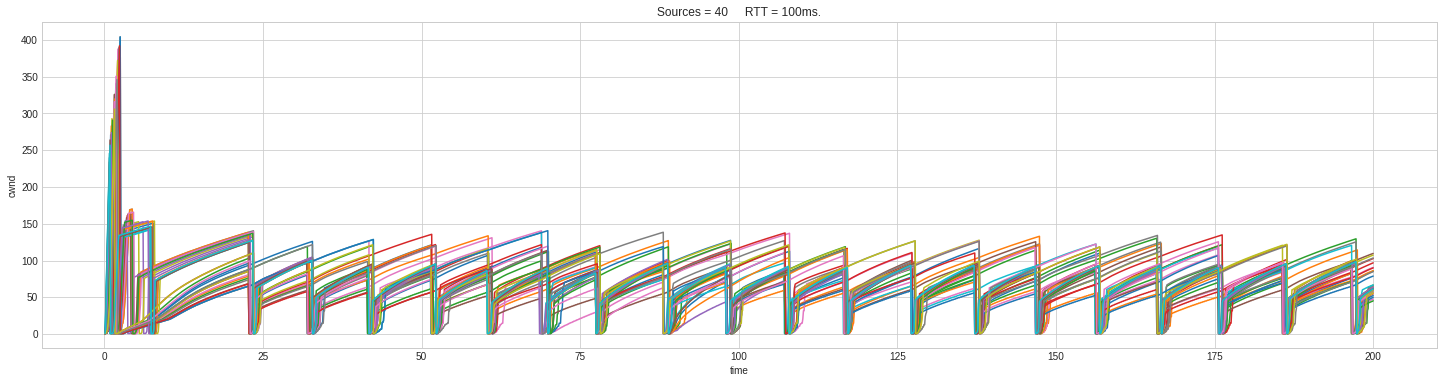

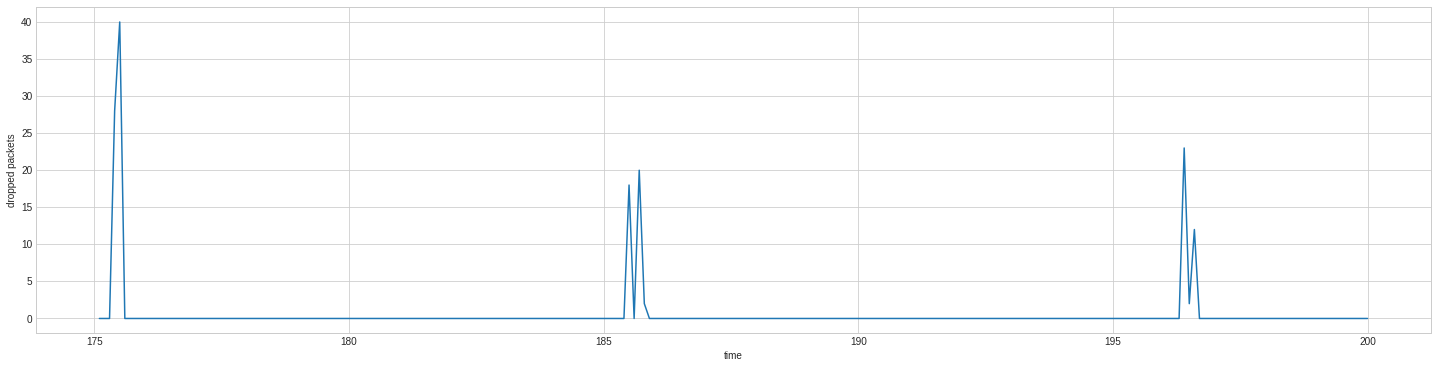

In [24]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 40, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 100, recvWindow = 10000)

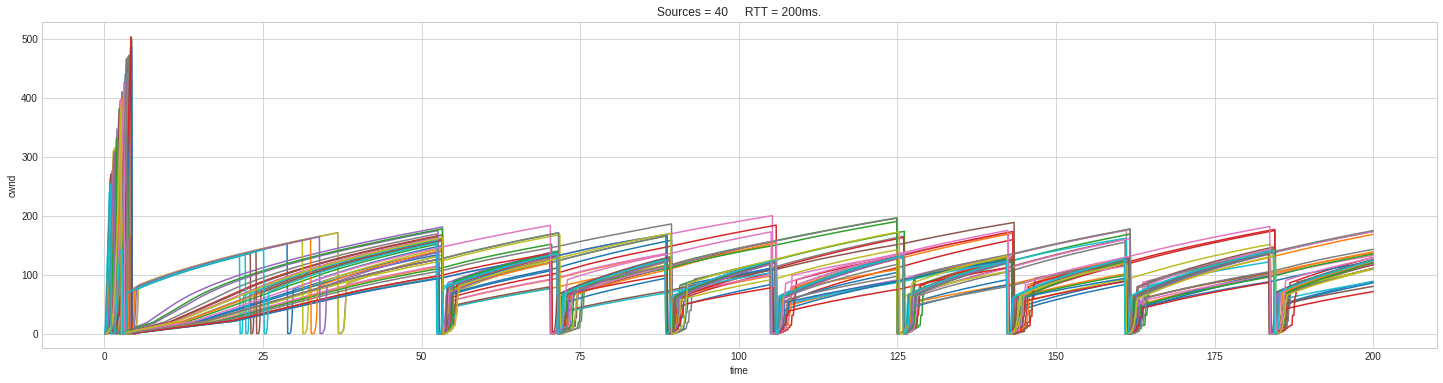

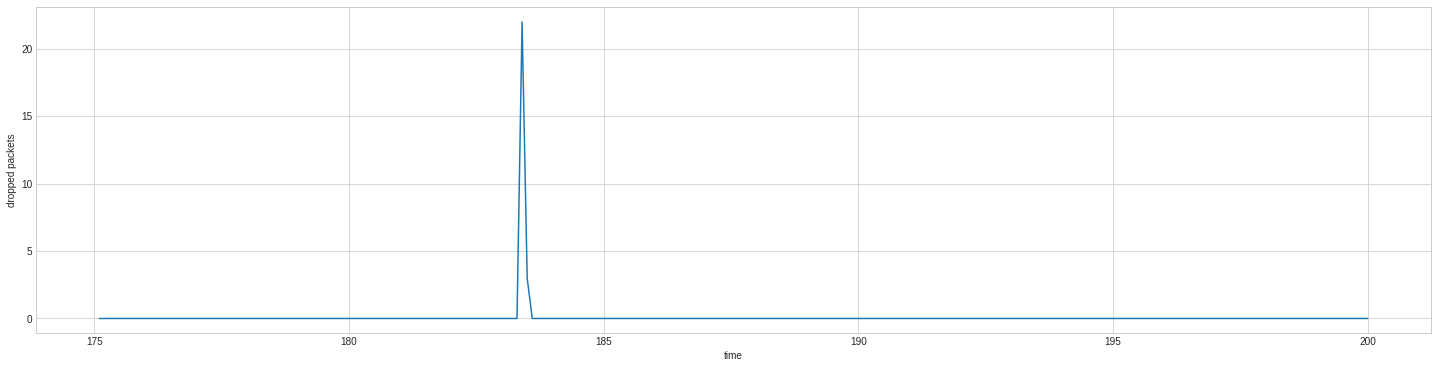

In [25]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 40, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 200, recvWindow = 10000)

### 1 source

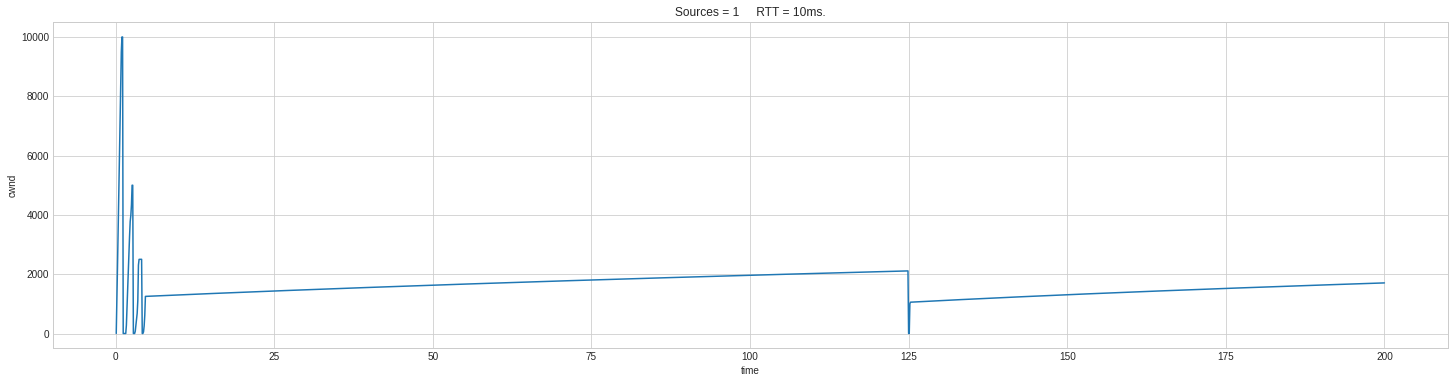

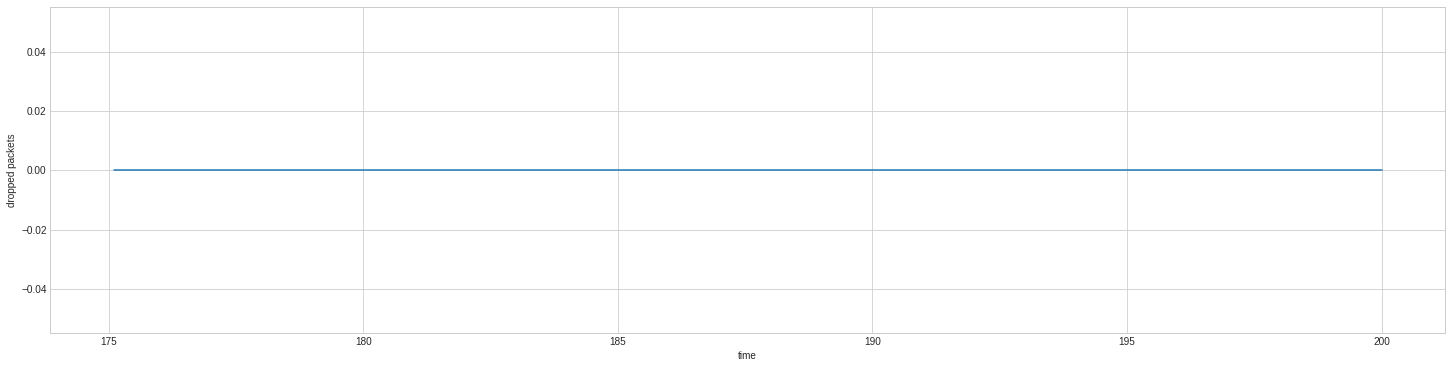

In [26]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 1, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 10, recvWindow = 10000)


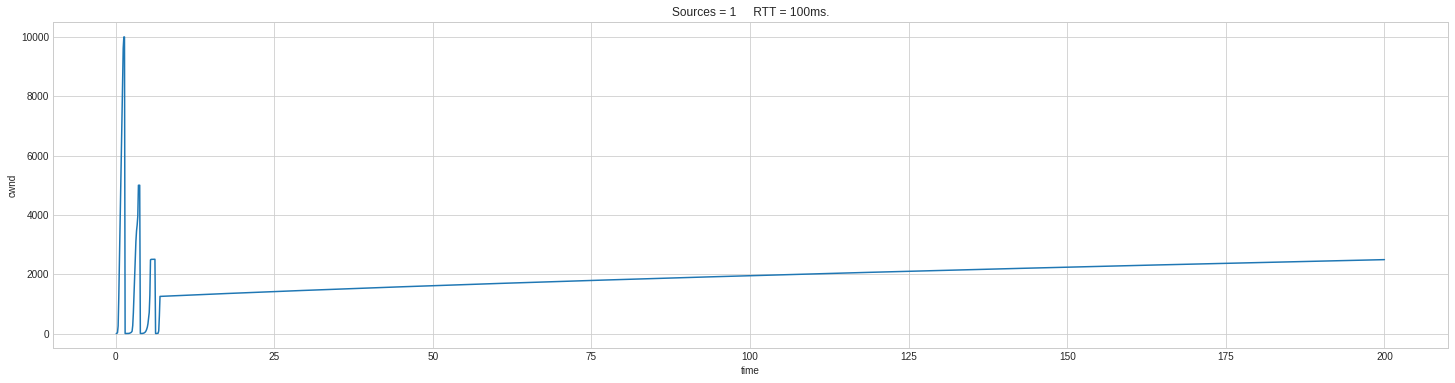

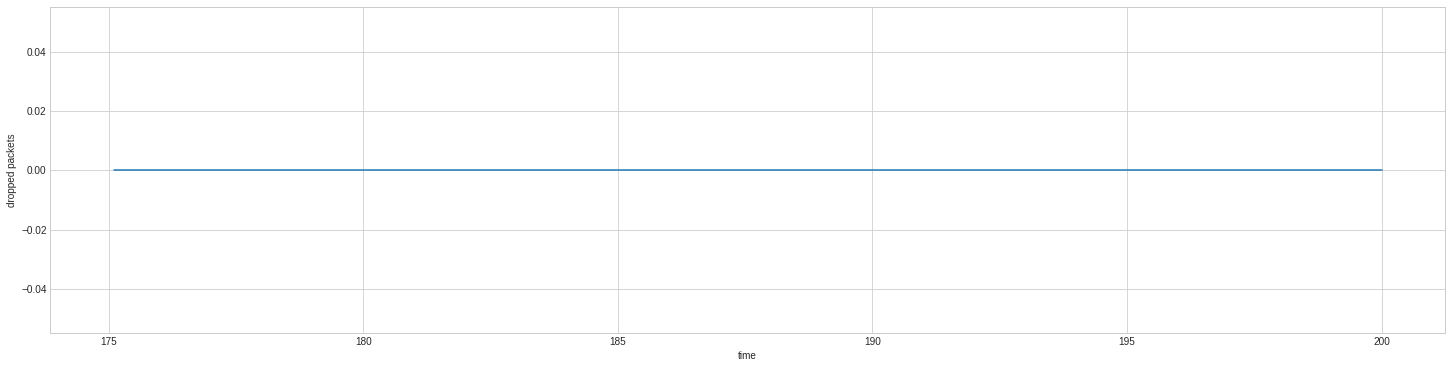

In [27]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 1, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 100, recvWindow = 10000)

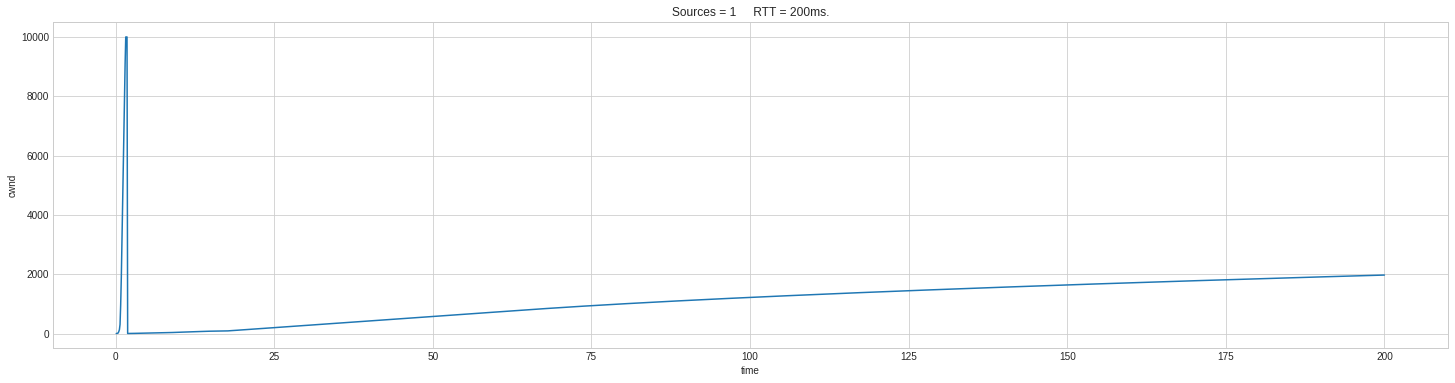

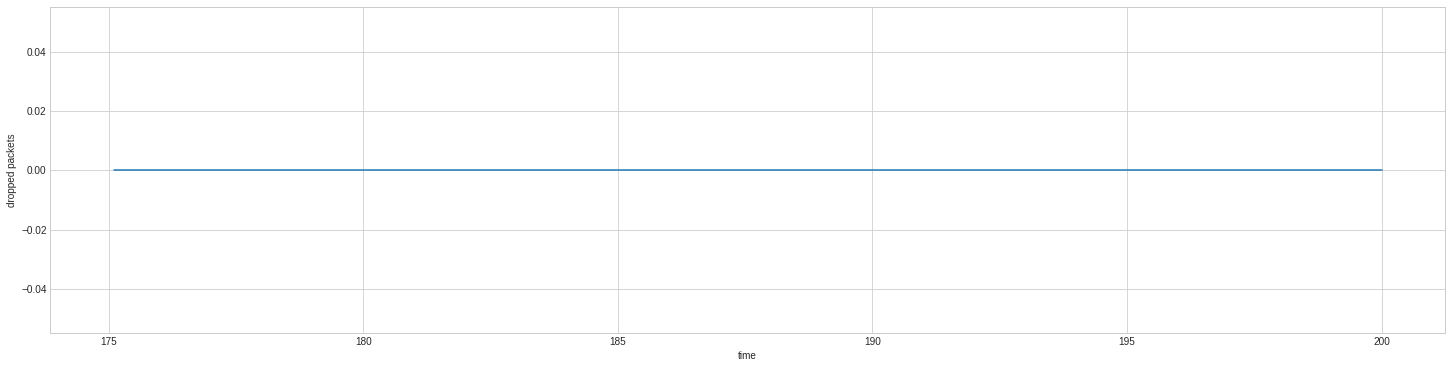

In [28]:
plot_cwnd_vs_time(flavor = "tahoe", time = 200, queueL = 2084, noOfSource = 1, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 200, recvWindow = 10000)